In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, Dense, TimeDistributed, Dropout
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


In [2]:

# Directory Structure
data_dir = "./data"
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")


In [3]:

# Image Dimensions
IMG_HEIGHT, IMG_WIDTH = 128, 128
BATCH_SIZE = 32
EPOCHS = 30


In [4]:

# Data Preprocessing
datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = datagen.flow_from_directory(
    train_dir, target_size=(IMG_HEIGHT, IMG_WIDTH), batch_size=BATCH_SIZE, class_mode='categorical')
val_generator = datagen.flow_from_directory(
    val_dir, target_size=(IMG_HEIGHT, IMG_WIDTH), batch_size=BATCH_SIZE, class_mode='categorical')


Found 33984 images belonging to 4 classes.
Found 6400 images belonging to 4 classes.


In [5]:

# Define RNN Model
def build_rnn_model():
    model = Sequential([
        TimeDistributed(Flatten(), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        LSTM(64, return_sequences=True),
        LSTM(32),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(4, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [6]:

# Define CNN + RNN Hybrid Model
def build_cnn_rnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        TimeDistributed(Flatten()),
        LSTM(64, return_sequences=True),
        LSTM(32),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(4, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [7]:
def train_and_evaluate(model, model_name):
    history = model.fit(
        train_generator,
        epochs=30,
        validation_data=val_generator
    )
    
    print(f"{model_name} Evaluation:")
    results = model.evaluate(val_generator)
    print(f"Loss: {results[0]}, Accuracy: {results[1]}")
    
    return history


In [8]:
import matplotlib.pyplot as plt

def plot_accuracy_loss(history, model_name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title(f'{model_name} - Accuracy vs Epochs')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title(f'{model_name} - Loss vs Epochs')

    plt.tight_layout()
    plt.show()


In [9]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix_heatmap(model, generator, model_name):
    # Get true labels and predictions
    true_labels = generator.classes
    class_labels = list(generator.class_indices.keys())

    # Get predicted probabilities and convert to predicted class
    predictions = model.predict(generator)
    predicted_classes = np.argmax(predictions, axis=1)

    # Generate confusion matrix
    cm = confusion_matrix(true_labels, predicted_classes)
    report = classification_report(true_labels, predicted_classes, target_names=class_labels)
    print(f"\nClassification Report for {model_name}:\n{report}")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


c:\Users\molim\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30


c:\Users\molim\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1062/1062 ━━━━━━━━━━━━━━━━━━━━ 527s 491ms/step - accuracy: 0.3303 - loss: 1.3257 - val_accuracy: 0.5075 - val_loss: 0.9804
Epoch 2/30
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 73s 68ms/step - accuracy: 0.4937 - loss: 1.0614 - val_accuracy: 0.4592 - val_loss: 1.0537
Epoch 3/30
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 74s 69ms/step - accuracy: 0.5398 - loss: 0.9677 - val_accuracy: 0.5330 - val_loss: 0.9175
Epoch 4/30
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 70s 66ms/step - accuracy: 0.5676 - loss: 0.9131 - val_accuracy: 0.5280 - val_loss: 0.9152
Epoch 5/30
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 70s 66ms/step - accuracy: 0.5756 - loss: 0.8845 - val_accuracy: 0.4970 - val_loss: 0.8918
Epoch 6/30
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 71s 67ms/step - accuracy: 0.5935 - loss: 0.8511 - val_accuracy: 0.5119 - val_loss: 0.8727
Epoch 7/30
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 71s 66ms/step - accuracy: 0.5996 - loss: 0.8296 - val_accuracy: 0.5475 - val_loss: 0.8638
Epoch 8/30
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 71s 67ms/step - accuracy: 0.6164 - loss: 0.

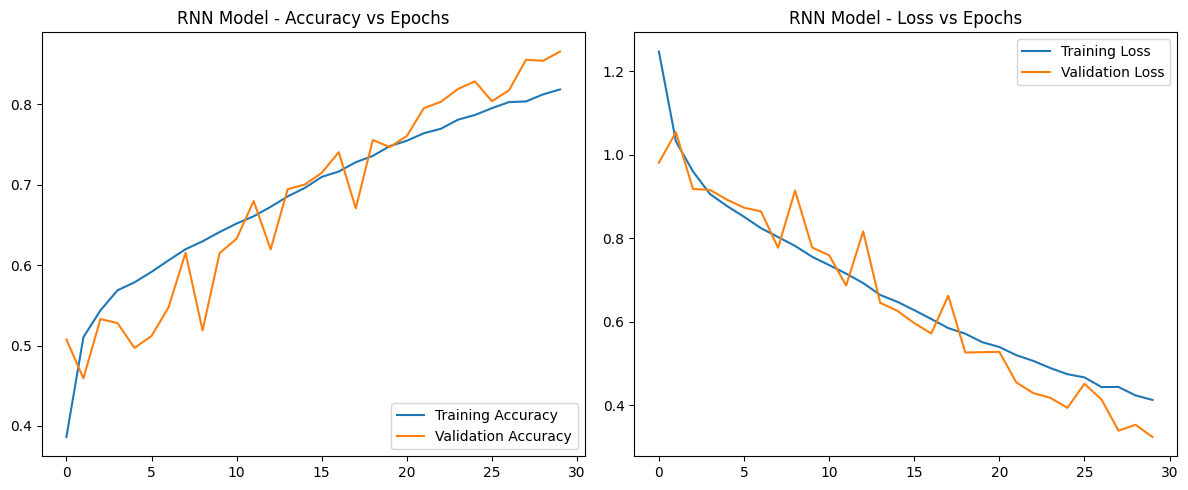

200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step

Classification Report for RNN Model:
                  precision    recall  f1-score   support

    MildDemented       0.15      0.16      0.15       896
ModerateDemented       0.02      0.02      0.02        64
     NonDemented       0.50      0.52      0.51      3200
VeryMildDemented       0.35      0.32      0.34      2240

        accuracy                           0.39      6400
       macro avg       0.25      0.25      0.25      6400
    weighted avg       0.39      0.39      0.39      6400



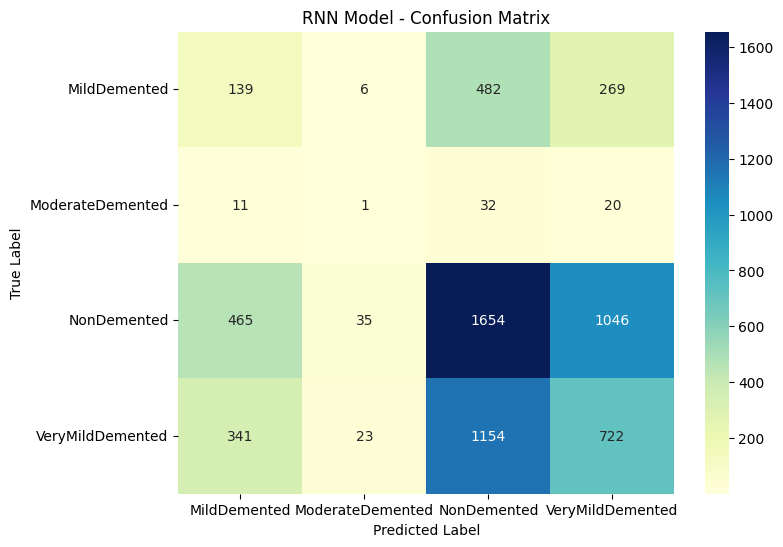

Epoch 1/30


c:\Users\molim\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1062/1062 ━━━━━━━━━━━━━━━━━━━━ 79s 71ms/step - accuracy: 0.4358 - loss: 1.1505 - val_accuracy: 0.5994 - val_loss: 0.7634
Epoch 2/30
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 75s 70ms/step - accuracy: 0.6894 - loss: 0.6679 - val_accuracy: 0.6450 - val_loss: 0.6460
Epoch 3/30
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 75s 70ms/step - accuracy: 0.7739 - loss: 0.5004 - val_accuracy: 0.8100 - val_loss: 0.4016
Epoch 4/30
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 75s 70ms/step - accuracy: 0.8379 - loss: 0.3817 - val_accuracy: 0.9125 - val_loss: 0.2229
Epoch 5/30
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 74s 70ms/step - accuracy: 0.8902 - loss: 0.2662 - val_accuracy: 0.9069 - val_loss: 0.2846
Epoch 6/30
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 75s 70ms/step - accuracy: 0.9208 - loss: 0.2110 - val_accuracy: 0.9584 - val_loss: 0.1104
Epoch 7/30
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 75s 70ms/step - accuracy: 0.9427 - loss: 0.1464 - val_accuracy: 0.9705 - val_loss: 0.0865
Epoch 8/30
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 75s 70ms/step - accuracy: 0.9569 - loss: 0.11

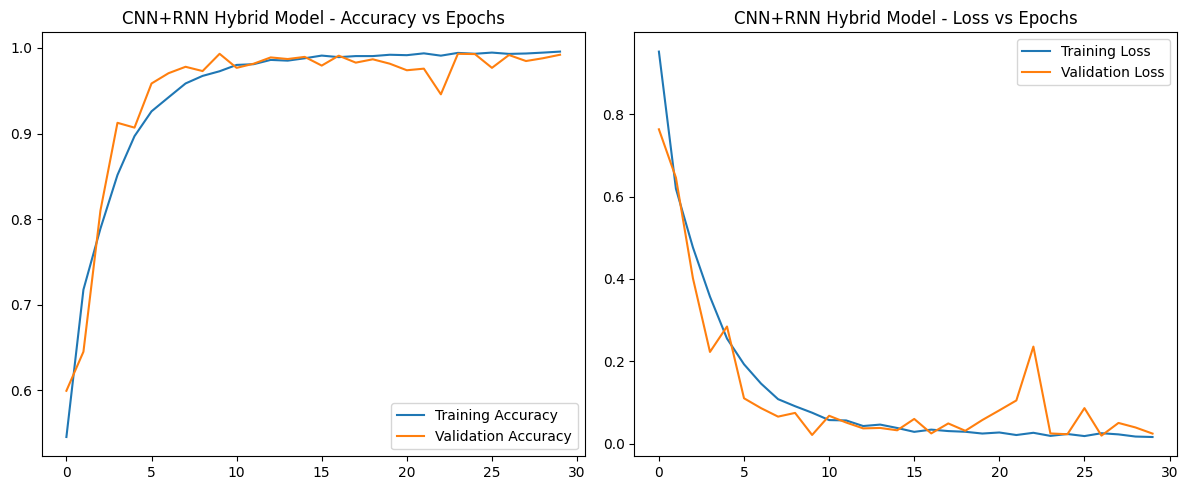

200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step

Classification Report for CNN+RNN Hybrid Model:
                  precision    recall  f1-score   support

    MildDemented       0.15      0.15      0.15       896
ModerateDemented       0.00      0.00      0.00        64
     NonDemented       0.51      0.50      0.50      3200
VeryMildDemented       0.36      0.36      0.36      2240

        accuracy                           0.40      6400
       macro avg       0.25      0.25      0.25      6400
    weighted avg       0.40      0.40      0.40      6400



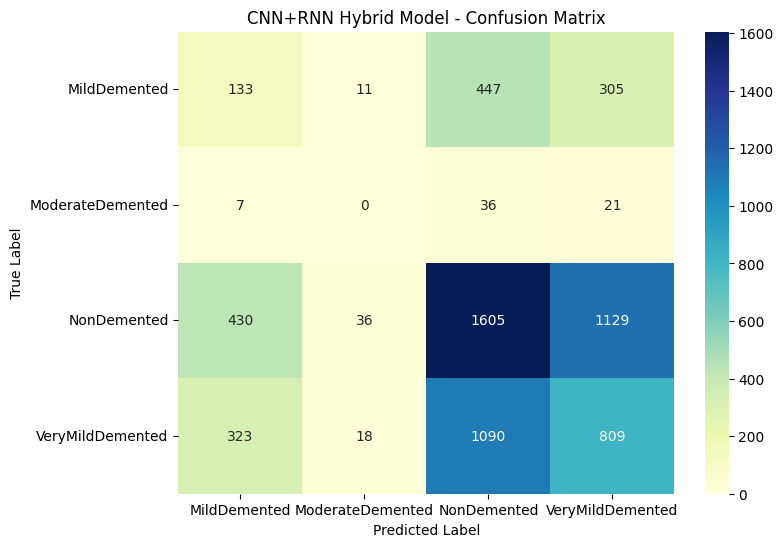

In [10]:
if __name__ == "__main__":
    rnn_model = build_rnn_model()
    rnn_history = train_and_evaluate(rnn_model, "RNN Model")
    plot_accuracy_loss(rnn_history, "RNN Model")
    plot_confusion_matrix_heatmap(rnn_model, val_generator, "RNN Model")
    
    cnn_rnn_model = build_cnn_rnn_model()
    cnn_rnn_history = train_and_evaluate(cnn_rnn_model, "CNN+RNN Hybrid Model")
    plot_accuracy_loss(cnn_rnn_history, "CNN+RNN Hybrid Model")
    plot_confusion_matrix_heatmap(cnn_rnn_model, val_generator, "CNN+RNN Hybrid Model")


In [11]:
# Save the RNN model
rnn_model.save("rnn_model.h5")

# Save the CNN+RNN model
cnn_rnn_model.save("cnn_rnn_model.h5")

rnn_model.save("cnn_rnn_model.keras")
cnn_rnn_model.save("rnn_model.keras")

In [12]:
from tensorflow.keras.models import load_model

# Load the saved RNN model
rnn_model = load_model("rnn_model.keras")

# Load the saved CNN+RNN model
cnn_rnn_model = load_model("cnn_rnn_model.keras")


c:\Users\molim\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
c:\Users\molim\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 766ms/step


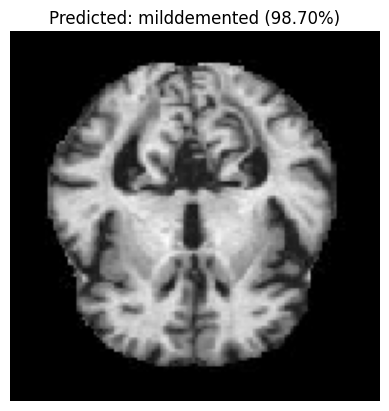

Model Prediction: milddemented with 98.70% confidence.


In [13]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
# Load the trained model (choose RNN or CNN+RNN)
model = load_model("cnn_rnn_model.keras")  # or use "cnn_rnn_model.keras"

# Define class names based on your folder structure
class_names = ["milddemented", "moderatedemented", "nondemented", "verymilddemented"]

# Function to load and preprocess an image
def classify_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))  # Resize to match model input
    img_array = image.img_to_array(img) / 255.0  # Normalize (0-1)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for model input

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)  # Get index of highest probability
    predicted_label = class_names[predicted_class]
    confidence = np.max(predictions) * 100  # Get confidence percentage

    # Show image and result
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {predicted_label} ({confidence:.2f}%)")
    plt.show()

    print(f"Model Prediction: {predicted_label} with {confidence:.2f}% confidence.")

# Example usage: Choose an image from the validation folder
val_image_path = "C:/Users/molim/PycharmProjects/DL Research/data/val/MildDemented/mildDem44.jpg"  # Change this to an actual image path
classify_image(val_image_path)

In [14]:
# # Function to load history from JSON
# def load_history(filename):
#     with open(filename, "r") as f:
#         history_dict = json.load(f)
#     return history_dict

# # Load histories
# rnn_history = load_history("rnn_history.json")
# cnn_rnn_history = load_history("cnn_rnn_history.json")

# # Function to plot accuracy and loss
# def plot_metrics(history, model_name):
#     epochs = range(1, len(history["accuracy"]) + 1)

#     # Plot accuracy
#     plt.figure(figsize=(12, 5))

#     plt.subplot(1, 2, 1)
#     plt.plot(epochs, history["accuracy"], "b", label="Training Accuracy")
#     plt.plot(epochs, history["val_accuracy"], "r", label="Validation Accuracy")
#     plt.title(f"{model_name} Accuracy Over Epochs")
#     plt.xlabel("Epochs")
#     plt.ylabel("Accuracy")
#     plt.legend()

#     # Plot loss
#     plt.subplot(1, 2, 2)
#     plt.plot(epochs, history["loss"], "b", label="Training Loss")
#     plt.plot(epochs, history["val_loss"], "r", label="Validation Loss")
#     plt.title(f"{model_name} Loss Over Epochs")
#     plt.xlabel("Epochs")
#     plt.ylabel("Loss")
#     plt.legend()

#     plt.show()

# # Call the function for both models
# plot_metrics(rnn_history, "RNN Model")
# plot_metrics(cnn_rnn_history, "CNN+RNN Hybrid Model")
